In [ ]:
import sys
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sys.path.insert(0, '../')
import lib.feature as ft
from lib.constants import *

In [75]:
# Load the audio file 
audio_path = '../data/misc_songs/Tainted Love.mp3'
audio_signal, sr = librosa.load(audio_path)

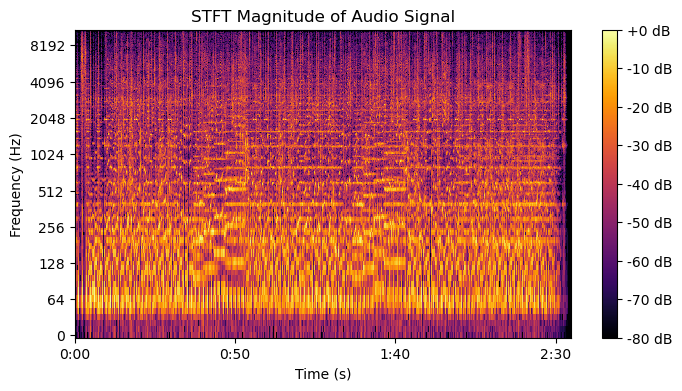

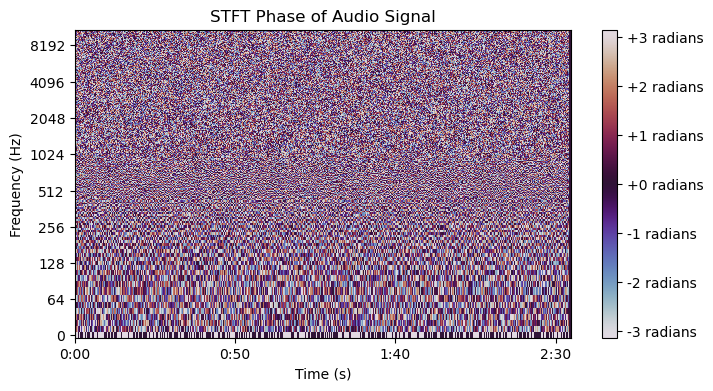

In [7]:
# Compute the STFT of the audio signal
n_fft = N_FFT  # Length of the FFT window
hop_length = HOP_LENGTH  # Number of samples between successive frames
stft_matrix = librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length)

# Convert the complex-valued STFT matrix to magnitude and phase
stft_magnitude = np.abs(stft_matrix)
stft_phase = np.angle(stft_matrix)

# Convert the magnitude to decibels (dB)
stft_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

# Plot the STFT magnitude
plt.figure(figsize=(8, 4))
librosa.display.specshow(stft_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Plot the STFT phase
plt.figure(figsize=(8, 4))
librosa.display.specshow(stft_phase, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='twilight')
plt.colorbar(format='%+2.0f radians')
plt.title('STFT Phase of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [76]:
# Data on this track from tracks.csv
tracks = pd.read_csv('../data/meta/tracks.csv')
track = tracks.query("track_id == '12t6wktp' and mix_id == 'jwmtj61'").squeeze()

print(f"Mix ID: {track['mix_id']}")
print(f"Track ID: {track['track_id']}")
print(f"BPM: {track['bpm']}")
print(f"Key: {track['key']}")
print(f"Audio Sample Rate: {track['audio_sr']}")
print(f"Audio Length: {track['audio_length']} seconds")
print(f"Audio Size: {track['audio_size']} MB")

Mix ID: jwmtj61
Track ID: 12t6wktp
BPM: 122.4489795918
Key: Eb major
Audio Sample Rate: 44100
Audio Length: 202.9303401361 seconds
Audio Size: 3.097495079 MB


________________________________________________________________________________
[Memory] Calling lib.feature.beat_activations...
beat_activations('../data/misc_songs/Tainted Love.mp3')
________________________________________________beat_activations - 40.5s, 0.7min
Beat Activations:
[0.01084447 0.00488267 0.00212458 ... 0.0038109  0.00688088 0.01412671]
Length of array: 15474


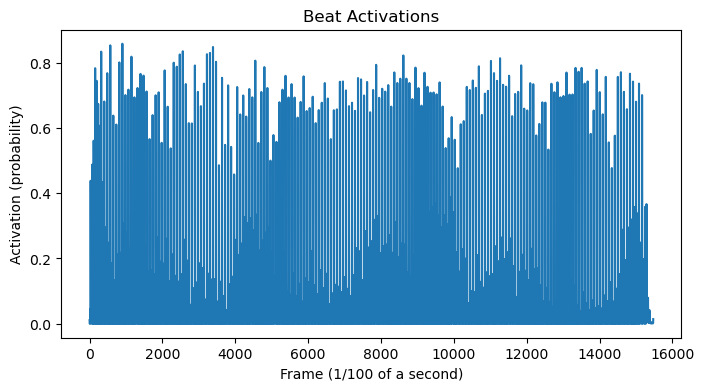

In [77]:
# Compute beat activations
beat_activations = ft.beat_activations(audio_path)

print('Beat Activations:')
print(beat_activations)
print(f"Length of array: {len(beat_activations)}")

plt.figure(figsize=(8, 4))
plt.plot(beat_activations)
plt.title('Beat Activations')
plt.xlabel('Frame (1/100 of a second)')
plt.ylabel('Activation (probability)')
plt.show()

________________________________________________________________________________
[Memory] Calling lib.feature.beat_times...
beat_times('../data/misc_songs/Tainted Love.mp3')
_______________________________________________________beat_times - 2.1s, 0.0min
First 12 values of beat_times: [0.3  0.71 1.12 1.53 1.95 2.36 2.77 3.19 3.61 4.02 4.44 4.85]
Difference between these beat_times: [0.41 0.41 0.41 0.42 0.41 0.41 0.42 0.42 0.41 0.42 0.41]


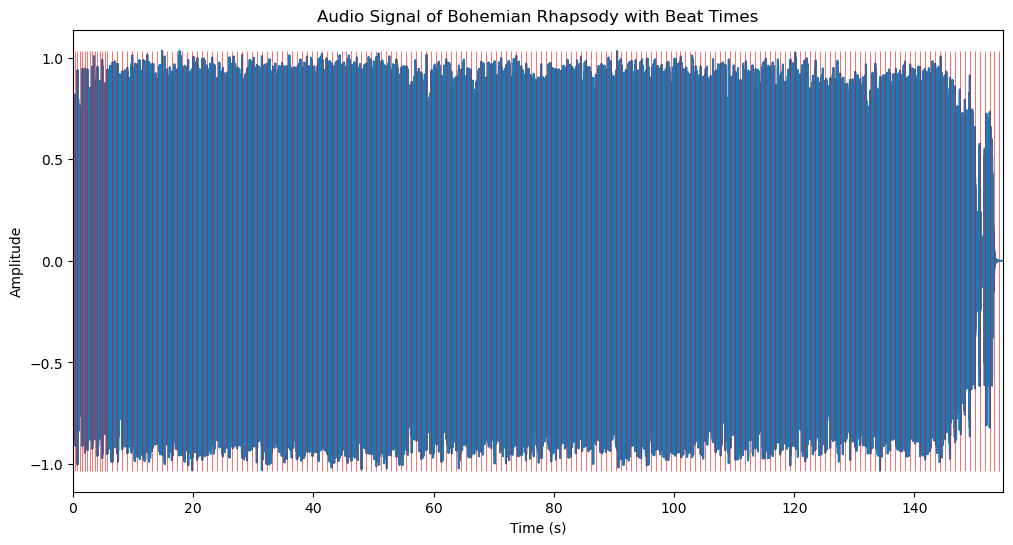

In [78]:
# Compute beat times
beat_times = ft.beat_times(audio_path)
print("First 12 values of beat_times:", beat_times[:12])
print("Difference between these beat_times:", np.diff(beat_times[:12]))

# Plot the audio waveform
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(audio_signal)) / sr, audio_signal)

# Create thin vertical lines at the beat times
plt.vlines(beat_times, np.min(audio_signal), np.max(audio_signal), colors='r', linestyles='solid', linewidths=0.4)

# Set the x-axis limits to the duration of the audio file
plt.xlim(0, len(audio_signal) / sr)

# Set the title and labels
plt.title('Audio Signal of Bohemian Rhapsody with Beat Times')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Show the plot
plt.show()

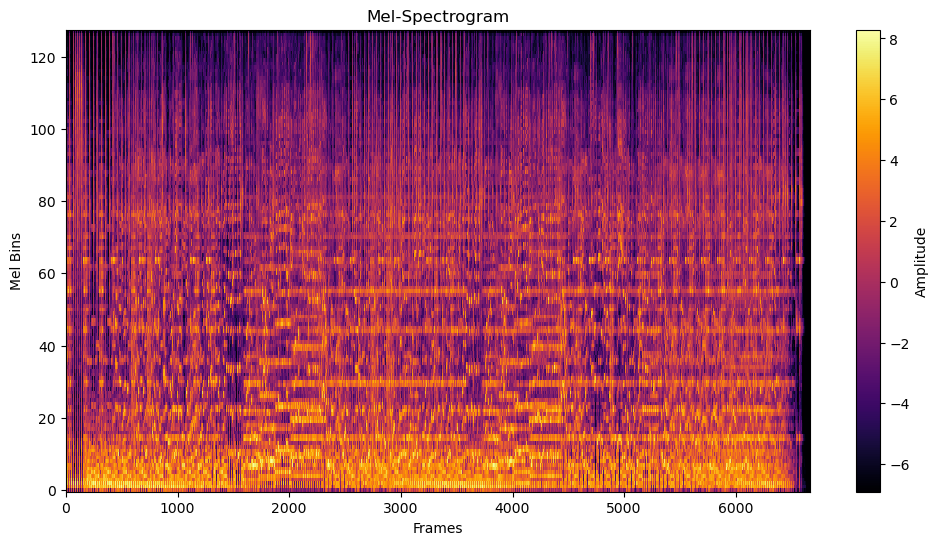

In [79]:
# Comput melspectrogram
melspectrogram = ft.melspectrogram(audio_path)
HOP_LENGTH = 512
SAMPLING_RATE = 22050

# Create an image of the melspectrogram
plt.figure(figsize=(12, 6))
plt.imshow(melspectrogram, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Frames')
plt.ylabel('Mel Bins')
plt.title('Mel-Spectrogram')
plt.colorbar(label='Amplitude')
plt.show()

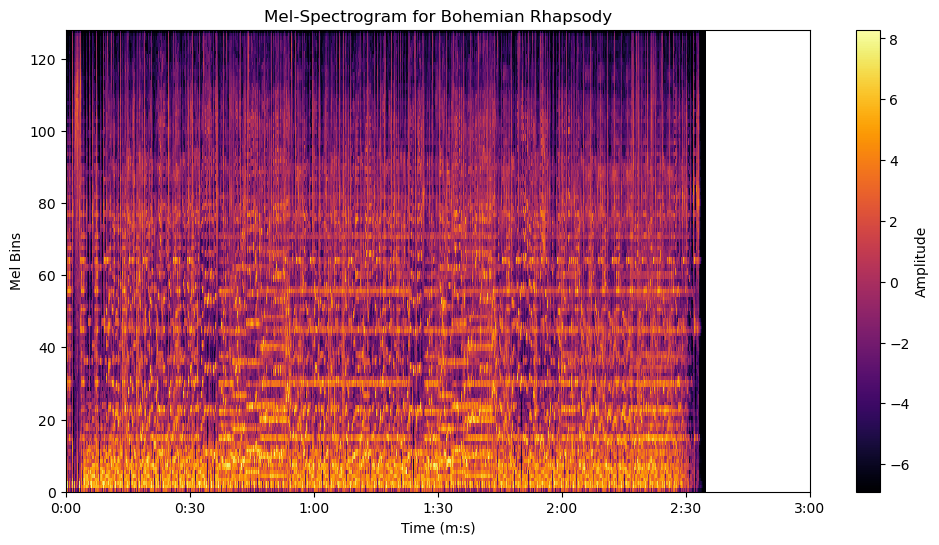

In [93]:
def format_time(x, pos):
    """Format the x-axis ticks as minutes:seconds."""
    minutes = int(x // 60)
    seconds = int(x % 60)
    return f'{minutes}:{seconds:02d}'

# Create an image of the time Mel-spectrogram
plt.figure(figsize=(12, 6))

# Convert frames to time in seconds
time_axis = np.arange(melspectrogram.shape[1]) * HOP_LENGTH / sr

plt.imshow(melspectrogram, cmap='inferno', origin='lower', aspect='auto', interpolation='none',
           extent=[time_axis[0], time_axis[-1], 0, melspectrogram.shape[0]])
plt.xlabel('Time (m:s)')
plt.ylabel('Mel Bins')
plt.title('Mel-Spectrogram for Bohemian Rhapsody')
plt.colorbar(label='Amplitude')

# Set specific ticks at 30-second intervals
max_time = time_axis[-1]
tick_positions = np.arange(0, max_time + 30, 30)
plt.xticks(tick_positions, [format_time(t, None) for t in tick_positions])

plt.show()

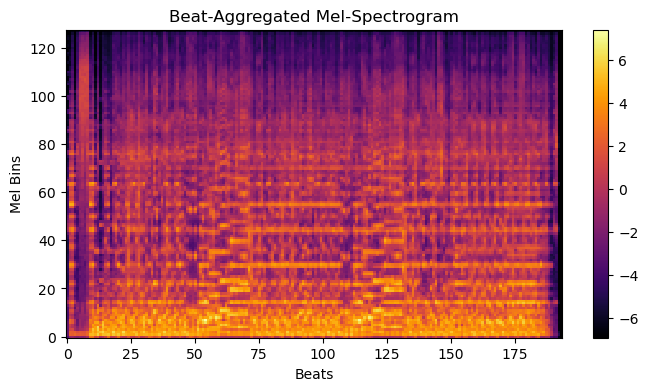

In [81]:
# Calculate the beat Mel-spectrogram
beat_melspectrogram = ft.beat_melspectrogram(audio_path)

# Create an image of the beat Mel-spectrogram
plt.figure(figsize=(8, 4))
plt.imshow(beat_melspectrogram, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Beats')
plt.ylabel('Mel Bins')
plt.title('Beat-Aggregated Mel-Spectrogram')
plt.colorbar()
plt.show()

________________________________________________________________________________
[Memory] Calling lib.feature.mfcc...
mfcc('../data/misc_songs/Tainted Love.mp3')
_____________________________________________________________mfcc - 0.5s, 0.0min


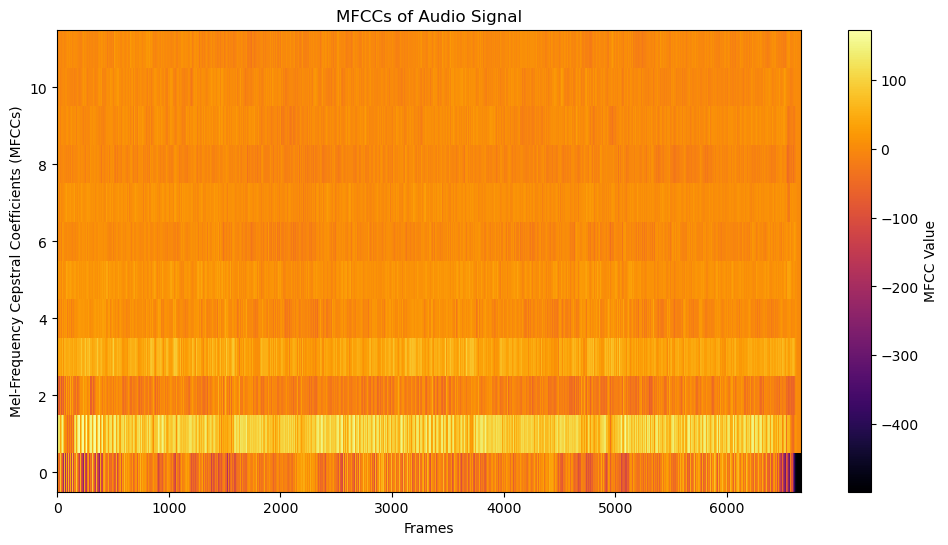

In [82]:
# Compute MFCCs
mfccs = ft.mfcc(audio_path)

# Create an image of the MFCCs
plt.figure(figsize=(12, 6))
plt.imshow(mfccs, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Frames')
plt.ylabel('Mel-Frequency Cepstral Coefficients (MFCCs)')
plt.title('MFCCs of Audio Signal')
plt.colorbar(label='MFCC Value')
plt.show()

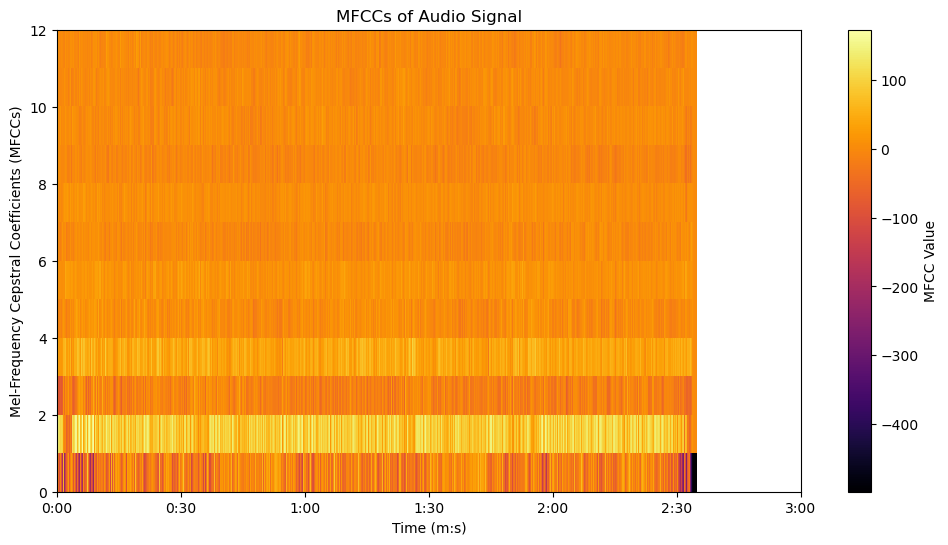

In [94]:
# Convert frames to time in seconds
time_axis = np.arange(mfccs.shape[1]) * HOP_LENGTH / sr

# Create an image of the MFCCs
plt.figure(figsize=(12, 6))
plt.imshow(mfccs, cmap='inferno', origin='lower', aspect='auto', interpolation='none',
           extent=[time_axis[0], time_axis[-1], 0, mfccs.shape[0]])
plt.xlabel('Time (m:s)')
plt.ylabel('Mel-Frequency Cepstral Coefficients (MFCCs)')
plt.title('MFCCs of Audio Signal')
plt.colorbar(label='MFCC Value')

# Set specific ticks at 30-second intervals up to the maximum time in the time_axis
max_time = time_axis[-1]
tick_positions = np.arange(0, max_time + 30, 30)
plt.xticks(tick_positions, [format_time(t, None) for t in tick_positions], fontsize=10)

plt.show()

________________________________________________________________________________
[Memory] Calling lib.feature.beat_mfcc...
beat_mfcc('../data/misc_songs/Tainted Love.mp3')
________________________________________________________beat_mfcc - 0.0s, 0.0min


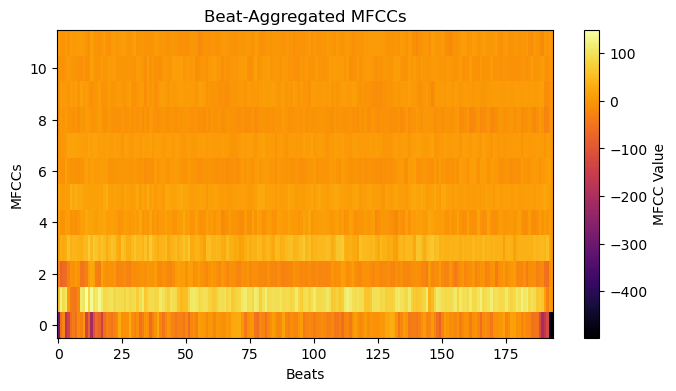

In [84]:
# Compute beat MFCCs
beat_mfccs = ft.beat_mfcc(audio_path)

# Create an image of the beat MFCCs
plt.figure(figsize=(8, 4))
plt.imshow(beat_mfccs, cmap='inferno', origin='lower', aspect='auto', interpolation='none')
plt.xlabel('Beats')
plt.ylabel('MFCCs')
plt.title('Beat-Aggregated MFCCs')
plt.colorbar(label='MFCC Value')
plt.show()

________________________________________________________________________________
[Memory] Calling lib.feature.chroma_cens...
chroma_cens('../data/misc_songs/Tainted Love.mp3')
______________________________________________________chroma_cens - 1.4s, 0.0min


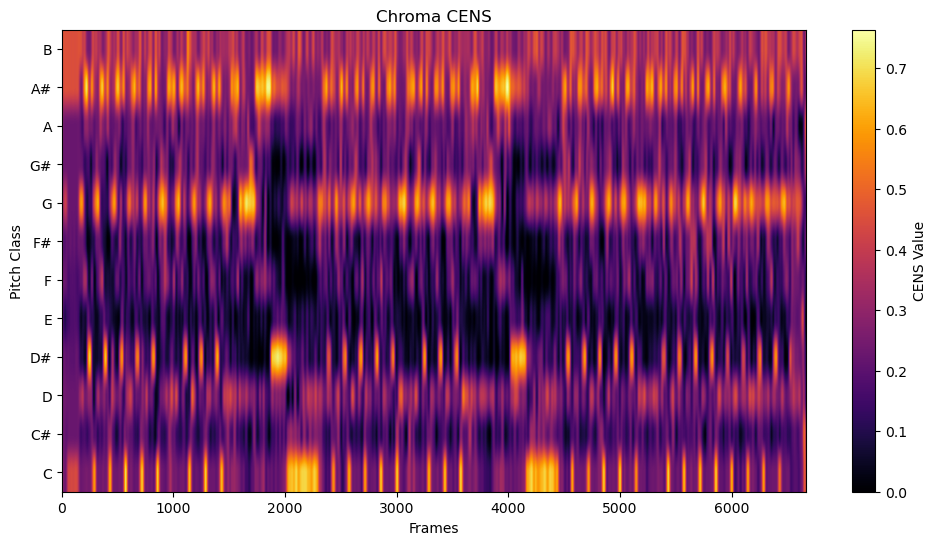

In [85]:
# Compute chroma CENS
chroma_cens = ft.chroma_cens(audio_path)

# Create an image of the chroma CENS
plt.figure(figsize=(12, 6))
plt.imshow(chroma_cens, cmap='inferno', origin='lower', aspect='auto')

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Frames')
plt.title('Chroma CENS')
plt.colorbar(label='CENS Value')
plt.show()

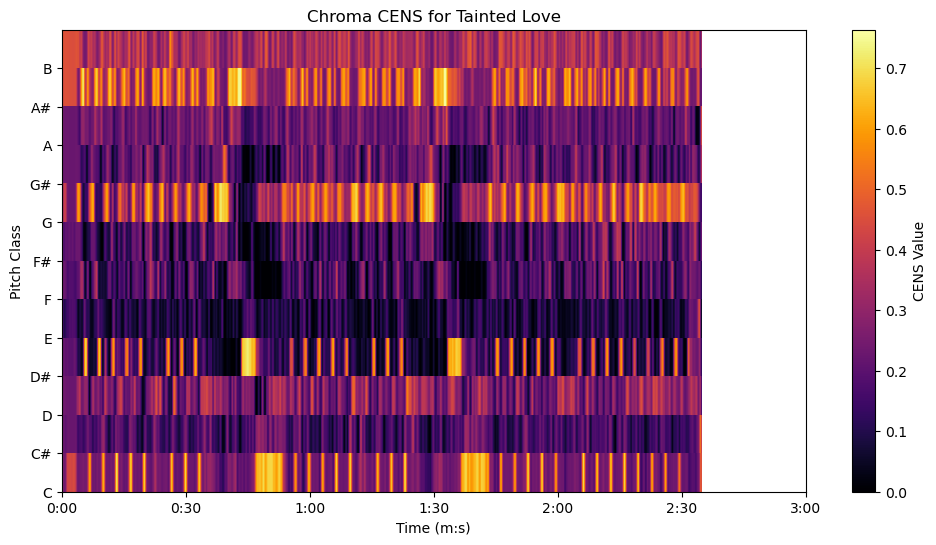

In [104]:
# Convert frames to time in seconds
time_axis = np.arange(chroma_cens.shape[1]) * HOP_LENGTH / sr

# Create an image of the chroma CENS
plt.figure(figsize=(12, 6))
plt.imshow(chroma_cens, cmap='inferno', origin='lower', aspect='auto', interpolation='none',
           extent=[time_axis[0], time_axis[-1], 0, chroma_cens.shape[0]])

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Time (m:s)')
plt.title('Chroma CENS for Tainted Love')
plt.colorbar(label='CENS Value')

# Set specific ticks at 30-second intervals up to the maximum time in the time_axis
max_time = time_axis[-1]
tick_positions = np.arange(0, max_time + 30, 30)
plt.xticks(tick_positions, [format_time(t, None) for t in tick_positions], fontsize=10)

plt.show()

________________________________________________________________________________
[Memory] Calling lib.feature.beat_chroma_cens...
beat_chroma_cens('../data/misc_songs/Tainted Love.mp3')
_________________________________________________beat_chroma_cens - 0.0s, 0.0min


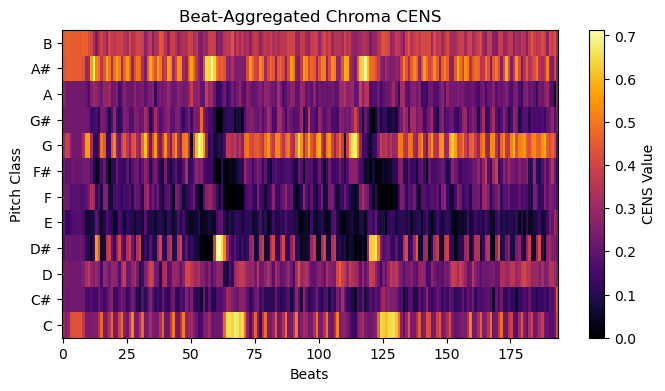

In [87]:
# Compute beat chroma CENS
beat_chroma_cens = ft.beat_chroma_cens(audio_path)

# Create an image of the beat chroma CENS
plt.figure(figsize=(8, 4))
plt.imshow(beat_chroma_cens, cmap='inferno', origin='lower', aspect='auto', interpolation='none')

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Beats')
plt.title('Beat-Aggregated Chroma CENS')
plt.colorbar(label='CENS Value')
plt.show()

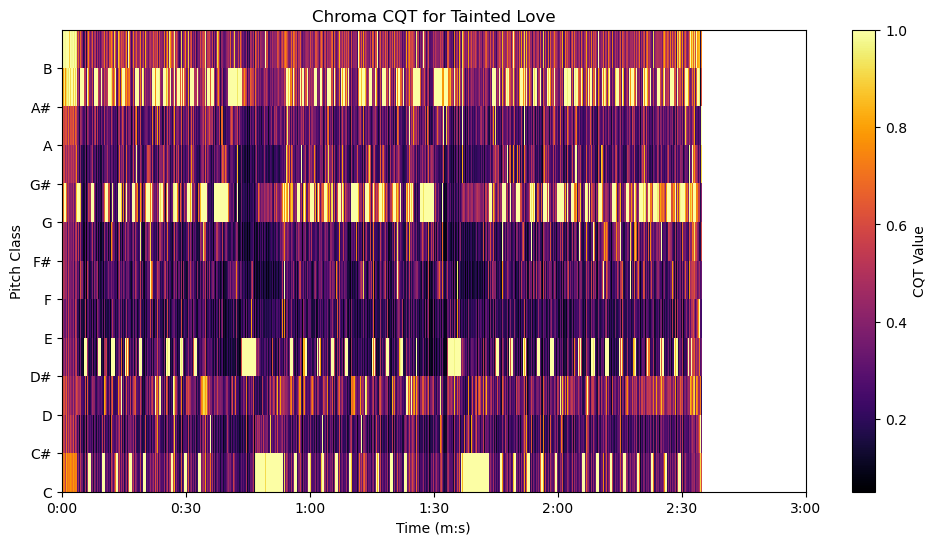

In [103]:
# Compute chroma CQT
chroma_cqt = ft.chroma_cqt(audio_path)

# Convert frames to time in seconds
time_axis = np.arange(chroma_cqt.shape[1]) * HOP_LENGTH / sr

# Create an image of the chroma CQT
plt.figure(figsize=(12, 6))
plt.imshow(chroma_cqt, cmap='inferno', origin='lower', aspect='auto', interpolation='none',
           extent=[time_axis[0], time_axis[-1], 0, chroma_cqt.shape[0]])

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Time (m:s)')
plt.title('Chroma CQT for Tainted Love')
plt.colorbar(label='CQT Value')

# Set specific ticks at 30-second intervals up to the maximum time in the time_axis
max_time = time_axis[-1]
tick_positions = np.arange(0, max_time + 30, 30)
plt.xticks(tick_positions, [format_time(t, None) for t in tick_positions], fontsize=10)

plt.show()

________________________________________________________________________________
[Memory] Calling lib.feature.beat_chroma_cqt...
beat_chroma_cqt('../data/misc_songs/Tainted Love.mp3')
__________________________________________________beat_chroma_cqt - 0.0s, 0.0min


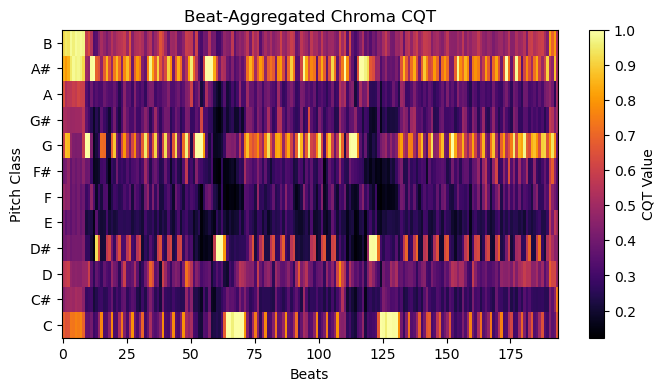

In [89]:
# Compute beat chroma CQT
beat_chroma_cqt = ft.beat_chroma_cqt(audio_path)

# Create an image of the beat chroma CENS
plt.figure(figsize=(8, 4))
plt.imshow(beat_chroma_cqt, cmap='inferno', origin='lower', aspect='auto', interpolation='none')

pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.yticks(np.arange(12), pitch_classes)
plt.ylabel('Pitch Class')

plt.xlabel('Beats')
plt.title('Beat-Aggregated Chroma CQT')
plt.colorbar(label='CQT Value')
plt.show()